# 계층적 군집 (2) - kaggle customer 데이터셋
- kaggle customer 데이터셋 적용하여 계층적 군집 수행
> https://data.hossam.kr/G02//customer.xlsx

## 1. 패키지 참조

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## 2. 데이터 가져오기

In [2]:
origin = read_excel('https://data.hossam.kr/G02//customer.xlsx')
print(origin.info())
origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    200 non-null    int64 
 1   성별      200 non-null    object
 2   나이      200 non-null    int64 
 3   연수입     200 non-null    int64 
 4   지출점수    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,고객ID,성별,나이,연수입,지출점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 3. 데이터 전처리
### 1) 필요한 변수 추출

In [3]:
x = origin.filter(['연수입', '지출점수'])
x

,연수입,지출점수
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### 2) 데이터 표준화

In [4]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std[:5] # 상위 5데이터만 확인

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

### 3) 데이터 분포 확인(좋은 습관)

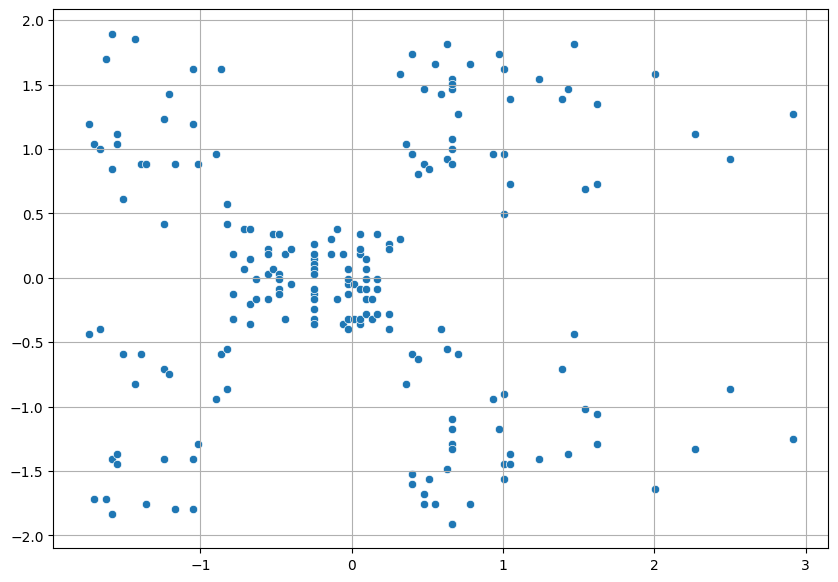

In [6]:
plt.figure(figsize = (10, 7))
sb.scatterplot(x = x_std[:, 0], y=x_std[:, 1])
plt.grid()
plt.show()
plt.close()   

## 4. 계층 군집 수행
### 1) scipy 패키지 사용

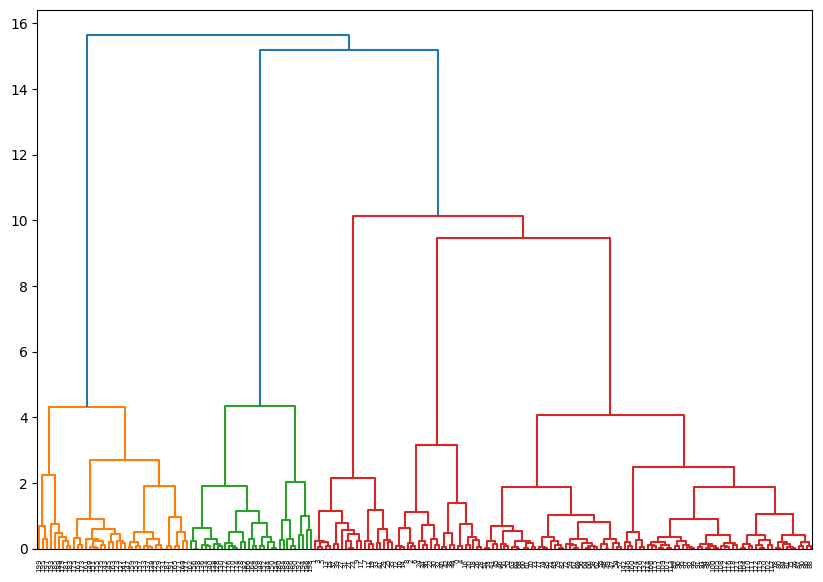

In [7]:
lnk = linkage(x_std, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(lnk, 
           show_leaf_counts = True)
plt.show()
plt.close()

### 2) sklearn 패키지 사용

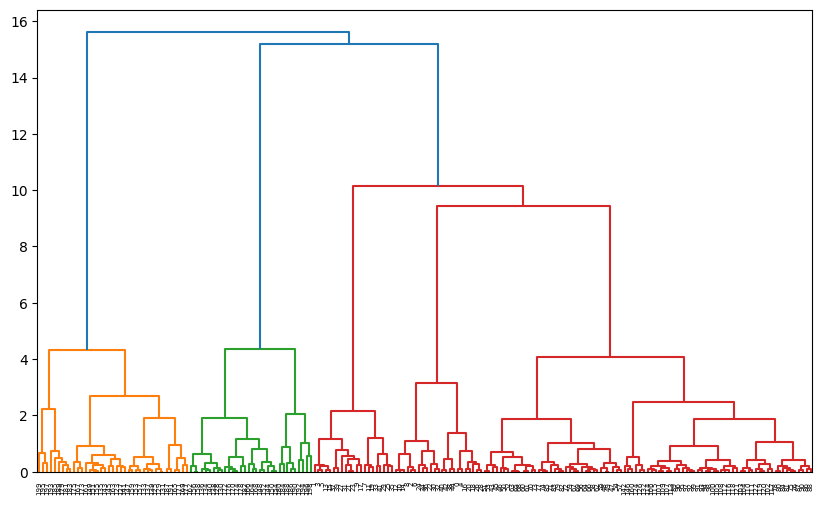

In [8]:
ac = AgglomerativeClustering(n_clusters = 2,
                              metric='euclidean',
                              linkage='ward',
                              compute_distances=True)
clustering = ac.fit(x_std)

counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)

for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
    ).astype(float)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.show()
plt.close()

## (추가) 나이, 연수입, 지출점수 계층 군집 수행

## 3. 데이터 전처리
### 1) 필요한 변수 추출
- 성별은 0과 1로 할 수 있으므로 나머지 변수들 표준화 한 후 나중에 추가

In [9]:
x_new = origin.filter(['나이', '연수입', '지출점수'])
x_new

,나이,연수입,지출점수
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### 2) 데이터 표준화

In [11]:
scaler = StandardScaler()
x_std_new = scaler.fit_transform(x_new)
x_std_df_new = DataFrame(x_std_new, columns = x_new.columns)
x_std_df_new

,나이,연수입,지출점수
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


### 3) 성별 (0과 1 값으로 변경 후) 추가

In [12]:
x_std_df_new['성별'] = origin['성별'].map({'Male': 0, 'Female': 1})
x_std_df_new

,나이,연수입,지출점수,성별
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,0


### 4) 데이터 분포 확인(좋은 습관)

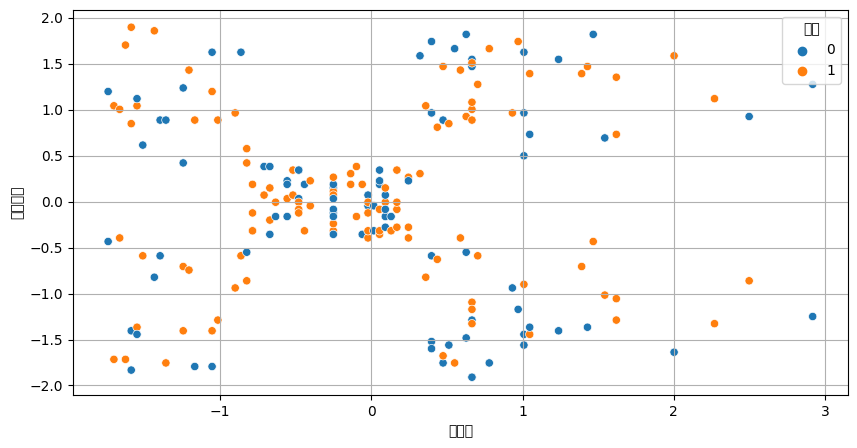

In [14]:
plt.figure(figsize = (10, 5))
sb.scatterplot(data=x_std_df_new,
               x='연수입',
               y='지출점수',
               hue='성별')
plt.grid()
plt.show()
plt.close()

## 4. 계층 군집 수행
### 1) scipy 패키지 사용

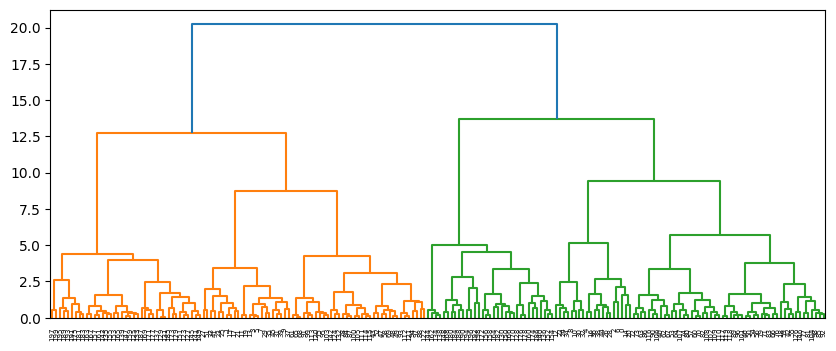

In [15]:
lnk = linkage(x_std_df_new, method='ward')

plt.figure(figsize=(10, 4))
dendrogram(lnk, 
           show_leaf_counts = True)
plt.show()
plt.close()

### 2) sklearn 패키지 사용

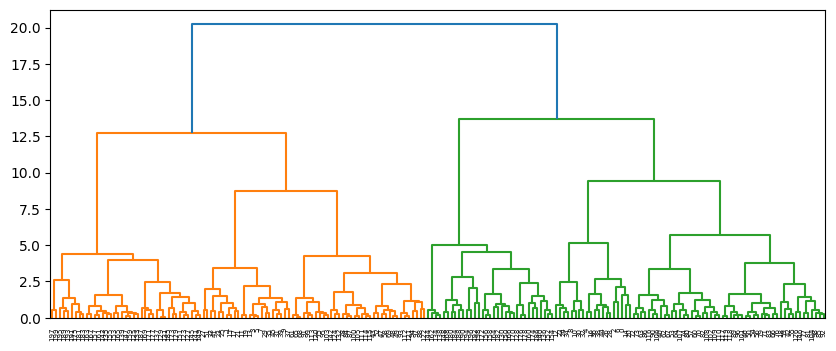

In [16]:
ac = AgglomerativeClustering(n_clusters = 5,
                              metric='euclidean',
                              linkage='ward',
                              compute_distances=True)
clustering = ac.fit(x_std_df_new)

counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)

for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
    ).astype(float)

plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix)
plt.show()
plt.close()

#### 군집수를 5로 제한했을 경우 분류 결과값

In [17]:
clustering.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 1, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

#### 분류 결과를 데이터프레임과 병합

In [18]:
origin['labels'] = clustering.labels_
origin

,고객ID,성별,나이,연수입,지출점수,labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


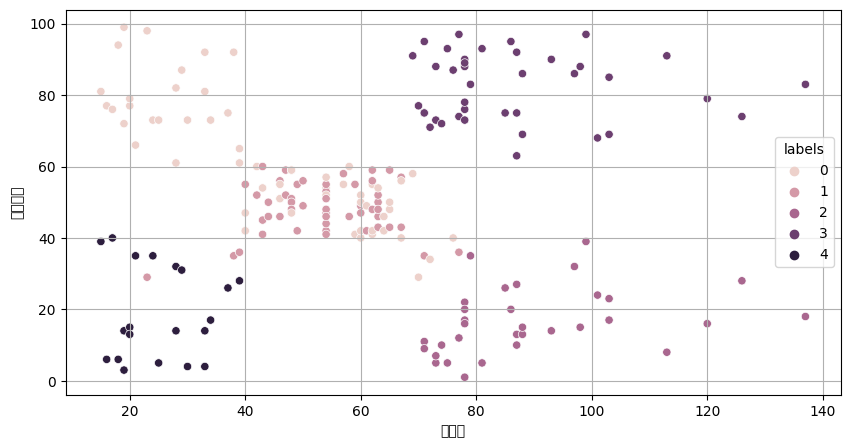

In [19]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=origin,
               x='연수입',
               y='지출점수',
               hue='labels')
plt.grid()
plt.show()
plt.close()